## What drives the price of a car?

### Overview

In this application, we explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  The goal is to understand what factors make a car more or less expensive.  As a result of the analysis, clear recommendations are provided to a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = https://media.githubusercontent.com/media/oaxana/car-price-prediction/main/images/crisp.png width = 30%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  A brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).

### Business Understanding

To convert this business framing to a data problem, the task is building predictive models to estimate the price of a used car based on various features. This involves:

- Feature Selection and Engineering: Identifying relevant features such as year, odometer, manufacturer, model, condition, cylinders, fuel type, transmission, drive type, size, type, paint color, and state.
- Data Cleaning and Preprocessing: Handling missing values and outliers, splitting data into training (80%) and test sets (20%), encoding categorical variables, - scaling numerical features.
- Model Building: Developing multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression, Decision Trees, Random Forests, and XGBoost, to predict car prices based on the selected features.
- Model Evaluation: Evaluating model performance using RMSE (Root Mean Squared Error) and R² (R-Squared) to ensure accurate and reliable predictions.

### Data Exploration (EDA) & Data Cleansing

Steps to Explore the Data:

- Review columns, data types, sample rows
- Check for NaN values and Outliers to identify data quality issues
- Review numerical columns for basic statistical description and graphically visualize potentially interesting relationships & numerical correlations
- Review categorical columns, their counts, values and visual representations
- Perform any initial data cleansing and re-do visualization of the data for better understanding of trends and correlations


In [4]:
#importing all libraries, packages and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [5]:
# importing dataset
df = pd.read_csv('https://media.githubusercontent.com/media/oaxana/car-price-prediction/main/vehicles.csv')

In [6]:
# review row counts and data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
# review a small sample of the data
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
418815,7308640849,kenosha-racine,2999,2006.0,honda,odyssey,like new,6 cylinders,gas,182000.0,clean,automatic,NaN,fwd,NaN,mini-van,NaN,wi
126942,7307206259,savannah / hinesville,37590,2019.0,NaN,Genesis G70 3.3T Advanced Sedan,good,6 cylinders,gas,12491.0,clean,other,KMTG74LE1KU017640,rwd,NaN,sedan,red,ga
422948,7314738689,milwaukee,3200,2002.0,jeep,grand cherokee limited 4x4,good,6 cylinders,gas,182485.0,clean,automatic,1J4GL58K62W110635,4wd,NaN,NaN,black,wi
273193,7313609366,long island,12000,2008.0,NaN,2008,excellent,8 cylinders,gas,115000.0,clean,automatic,NaN,NaN,NaN,NaN,red,ny
222470,7308939058,springfield,7995,2013.0,dodge,dart,NaN,4 cylinders,gas,137894.0,clean,manual,1C3CDFBA2DD309949,fwd,NaN,sedan,custom,mo
170161,7303836127,wichita,14995,2017.0,nissan,altima,NaN,4 cylinders,gas,60520.0,clean,automatic,1N4AL3AP2HC185144,NaN,NaN,sedan,black,ks
197969,7314426357,detroit metro,4999,2009.0,pontiac,montana,NaN,NaN,gas,149000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mi
358004,7307083585,memphis,20725,2010.0,chevrolet,camaro,NaN,8 cylinders,gas,65694.0,clean,manual,NaN,rwd,compact,coupe,silver,tn
263803,7315229172,albany,7995,2010.0,mazda,mazda3,NaN,NaN,gas,100533.0,clean,automatic,JM1BL1H68A1209819,NaN,NaN,hatchback,red,ny
403710,7311300264,kennewick-pasco-richland,7490,2012.0,ford,edge,good,NaN,gas,138616.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wa


In [8]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [9]:
# Handle missing values for what are assumed to be critical features to the analysis: Price, Year, Manufacturer, Odometer, Model
df_clean = df.dropna(subset=['price', 'year', 'manufacturer', 'odometer', 'model'])

In [10]:
# Check that missing values for critical features are removed
missing_values = df_clean.isnull().sum()
print(missing_values)

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       162083
cylinders       164298
fuel              2009
odometer             0
title_status      7173
transmission      1608
VIN             145944
drive           119566
size            287188
type             83236
paint_color     119318
state                0
dtype: int64


In [11]:
# Remove non-sensical prices.  Because the main focus of the analysis is to predict the price of a car, it's important to remove price outliers.  
# Based on my industry knowledge, I chose to remove prices under $1000 & over $300,000 as it's very unlikely to have cars that are priced outside this band.
# Removing these outliers also helps to see better data distribution in our charts later in the analysis.
df_clean = df_clean[(df_clean['price'] >= 1000) & (df_clean['price'] <= 300000)]

In [12]:
# Calculate and remove outliers for the critical feature Odometer. 
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Odometer
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df_clean[(df_clean['odometer'] >= lower_bound) & (df['odometer'] <= upper_bound)]

# Verify the cleaned data
print(df_clean['odometer'].describe())

# Verify the number of rows removed
initial_row_count = df_clean.shape[0]
final_row_count = df_clean.shape[0]
rows_removed = initial_row_count - final_row_count
print(f"Rows removed: {rows_removed}")

# There were a few thousand outliers if I did this step before removing the price outliers.
# Price outliers removal also helped remove outliers for odometer. 
# I wanted to show this step to demonstrate my understanding of outlier calculations, even though I used business sense for outliers in price.

count    356345.000000
mean      91263.905294
std       60749.409352
min           0.000000
25%       38071.000000
50%       86956.000000
75%      134248.000000
max      280966.000000
Name: odometer, dtype: float64
Rows removed: 0


/var/folders/nz/f0f_4rlj2tj3_cq2c2fvzppr0000gn/T/ipykernel_10433/1261337283.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df_clean['odometer'] >= lower_bound) & (df['odometer'] <= upper_bound)]


In [13]:
# drop features that don't matter to the analysis
df_clean = df_clean.drop(columns=['VIN', 'id','region'])
# check that the remaining numerical features do not include dropped columns
df_clean.describe()

,price,year,odometer
count,356345.000000,356345.000000,356345.000000
mean,19527.989064,2011.496496,91263.905294
std,14601.131017,8.645814,60749.409352
min,1000.000000,1900.000000,0.000000
25%,7995.000000,2008.000000,38071.000000
50%,15999.000000,2013.000000,86956.000000
75%,27990.000000,2017.000000,134248.000000
max,290000.000000,2022.000000,280966.000000


In [14]:
# group Model into top 20 and place the rest into Other. This column is very messy and would need alot of cleaning to be valuable past the top models.
# this step was also necessary in order for the model to run well after performing OneHotEncoder and is also helpful in 
def limit_categories(df_clean, column, max_categories=20):
    top_categories = df_clean[column].value_counts().index[:max_categories]
    df_clean[column] = df_clean[column].apply(lambda x: x if x in top_categories else 'Other')
    return df_clean

# Apply the function to high cardinality categorical features
df_clean = limit_categories(df_clean, 'model', max_categories=20)

# Check the unique values count
print(df_clean['model'].value_counts())

model
Other             305231
f-150               6768
silverado 1500      4288
1500                3615
camry               2658
silverado           2640
accord              2540
civic               2464
escape              2425
wrangler            2413
2500                2269
tacoma              2249
altima              2237
explorer            2159
grand cherokee      2072
mustang             1941
corolla             1903
equinox             1683
cr-v                1651
focus               1579
fusion              1560
Name: count, dtype: int64


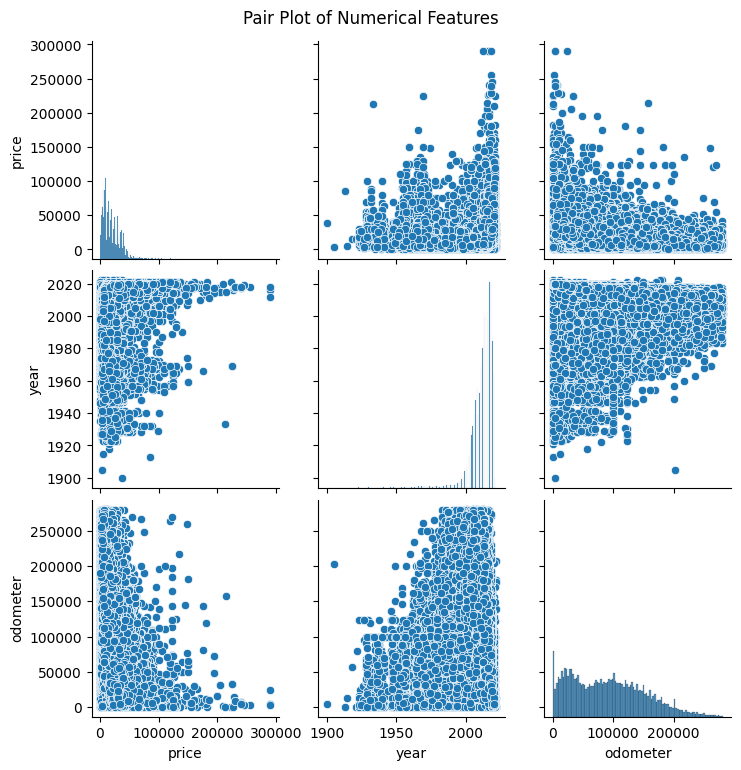

In [15]:
# Pair plot to explore relationships between numerical features
sns.pairplot(df_clean[['price', 'year', 'odometer']])
plt.suptitle('Pair Plot of Numerical Features', y= 1.02)
plt.show()

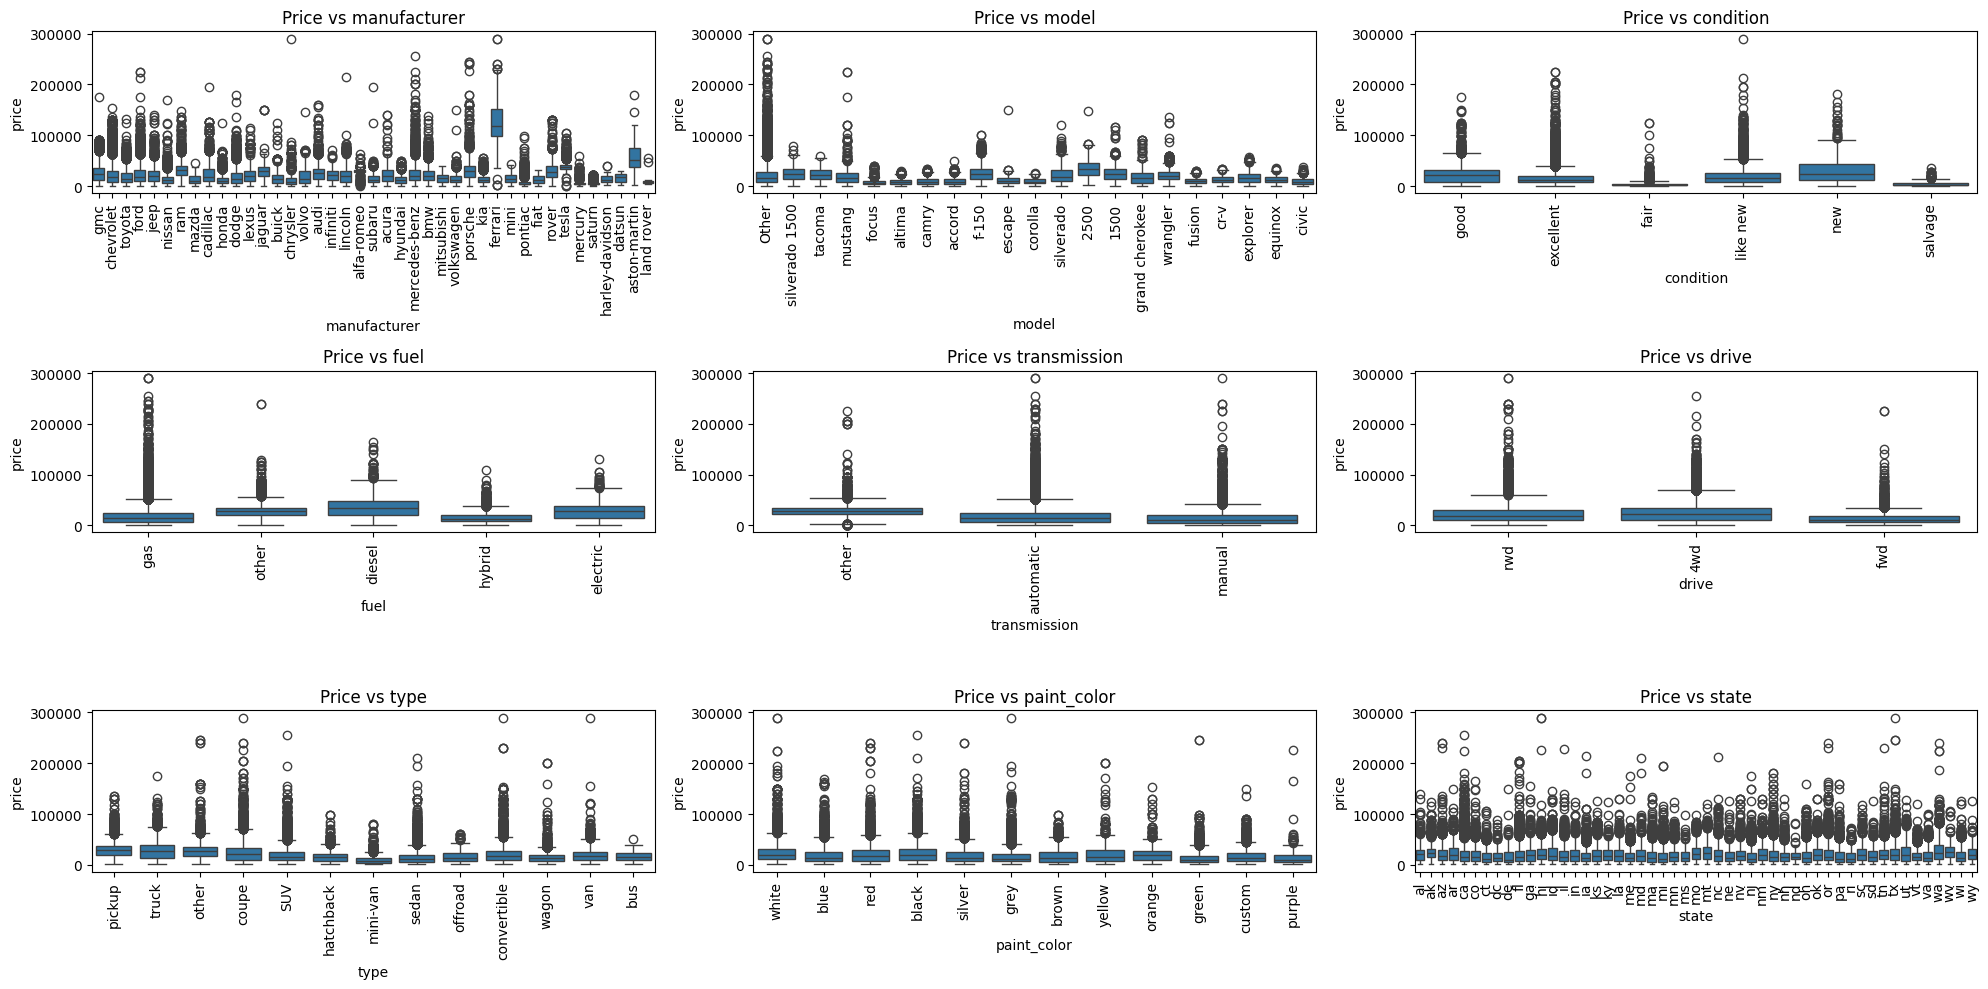

In [16]:
# Plot boxplots for some key categorical columns
categorical_columns = ['manufacturer', 'model','condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=column, y='price', data=df_clean)
    plt.title(f'Price vs {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

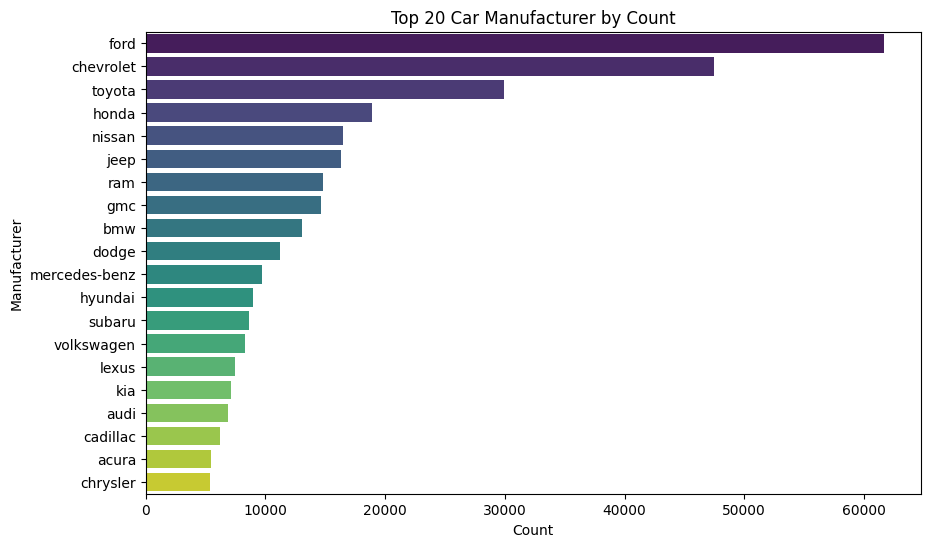

In [17]:
# Count the occurrences of each model
manufacture_counts = df_clean['manufacturer'].value_counts().head(20)  

# Plot top 20 models for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=manufacture_counts.values, y=manufacture_counts.index, hue=manufacture_counts.index, palette='viridis', dodge=False)
plt.title('Top 20 Car Manufacturer by Count')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.legend([], [], frameon=False) 
plt.show()

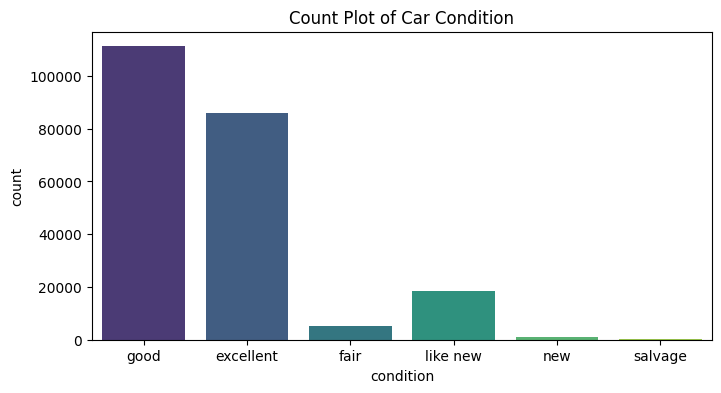

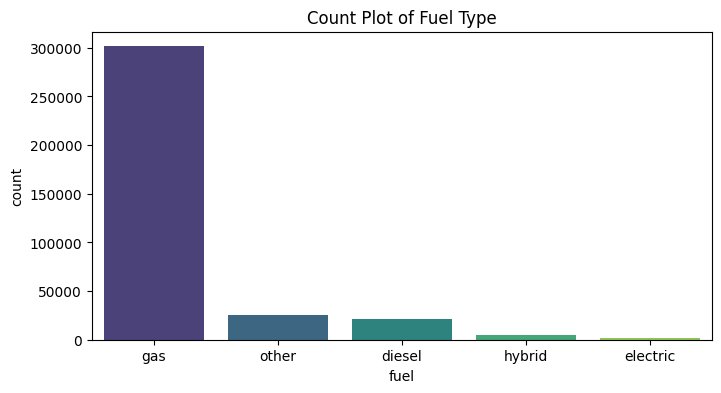

In [18]:
# Count plot for condition
plt.figure(figsize=(8, 4))
sns.countplot(x='condition', data=df_clean, hue='condition', palette='viridis', dodge=False)
plt.title('Count Plot of Car Condition')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

# Count plot for fuel type
plt.figure(figsize=(8, 4))
sns.countplot(x='fuel', data=df_clean, hue='fuel', palette='viridis', dodge=False)
plt.title('Count Plot of Fuel Type')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


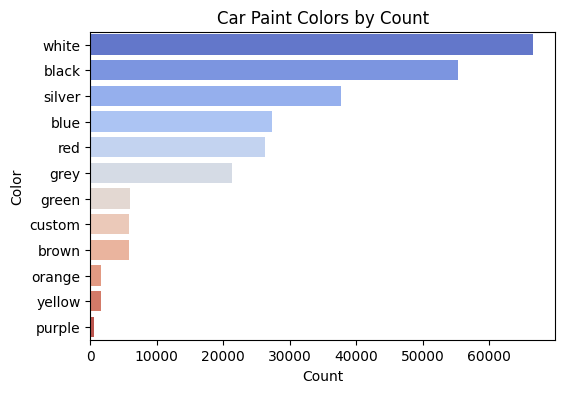

In [19]:
# Calculate the counts for each color
color_counts = df_clean['paint_color'].value_counts()

# Display colors by count
plt.figure(figsize=(6, 4))
sns.barplot(x=color_counts.values, y=color_counts.index, hue=color_counts.index, palette='coolwarm', dodge=False)
plt.title('Car Paint Colors by Count')
plt.xlabel('Count')
plt.ylabel('Color')
plt.legend([], [], frameon=False)
plt.show()

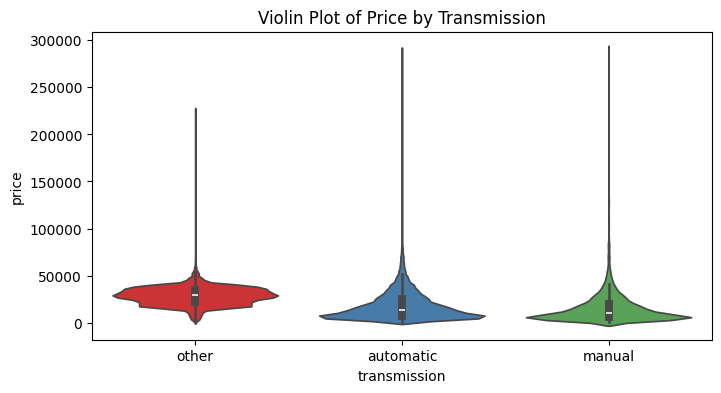

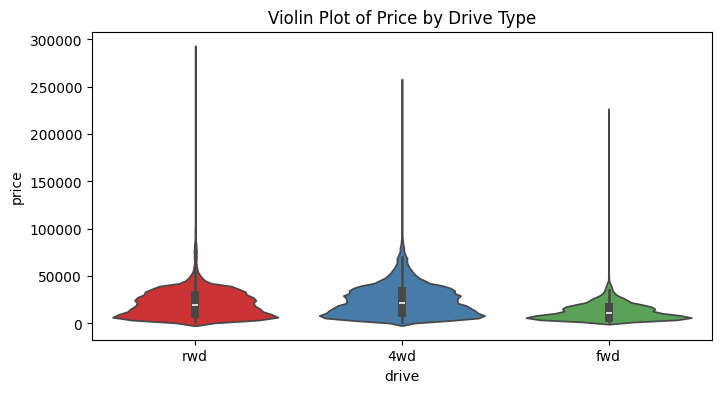

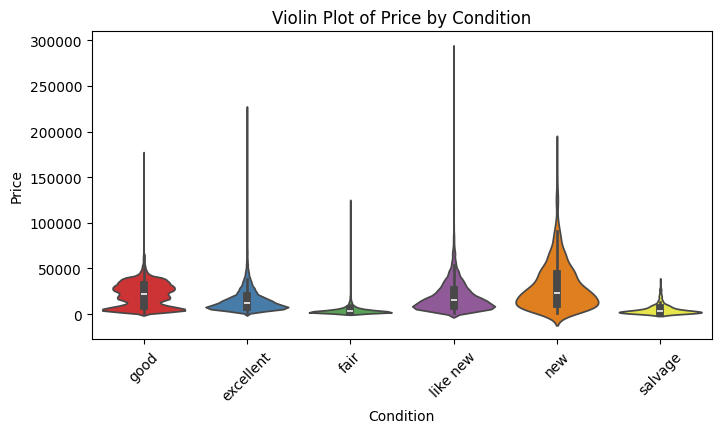

In [20]:
# Violin plot for price by transmission
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_clean, x='transmission', y='price', hue='transmission', palette='Set1', dodge=False)
plt.title('Violin Plot of Price by Transmission')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

# Violin plot for price by drive type
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_clean, x='drive', y='price', hue='drive', palette='Set1', dodge=False)
plt.title('Violin Plot of Price by Drive Type')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

# Violin plot for price by condition
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_clean, x='condition', y='price', hue='condition', palette='Set1', dodge=False)
plt.title('Violin Plot of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()


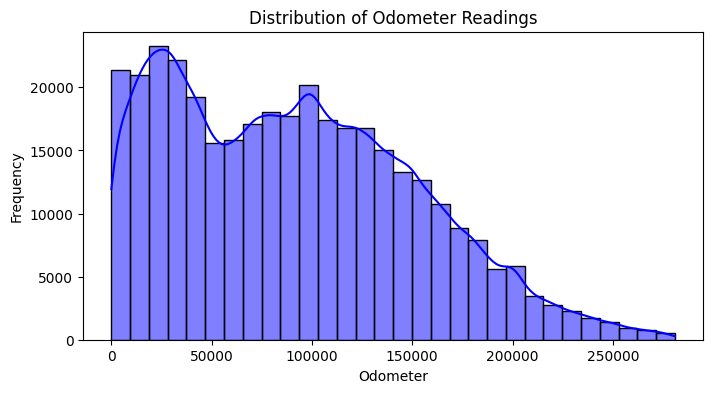

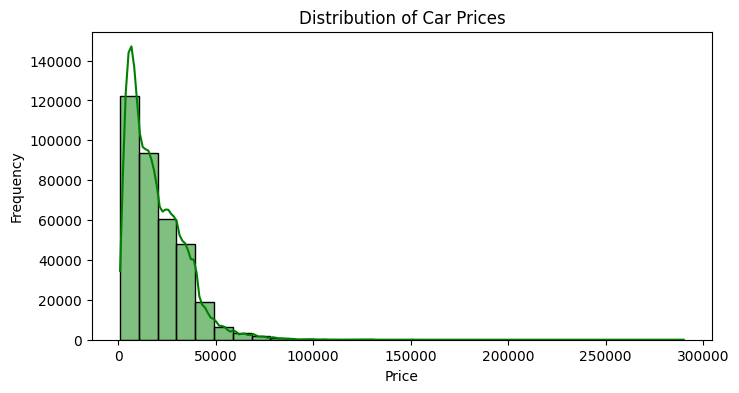

In [21]:
# Distribution Odomoeter and Price. These charts look much more informative now with the outliers removed.

# Distribution plot for odometer
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['odometer'], kde=True, bins=30, color='blue')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Distribution plot for price
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['price'], kde=True, bins=30, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

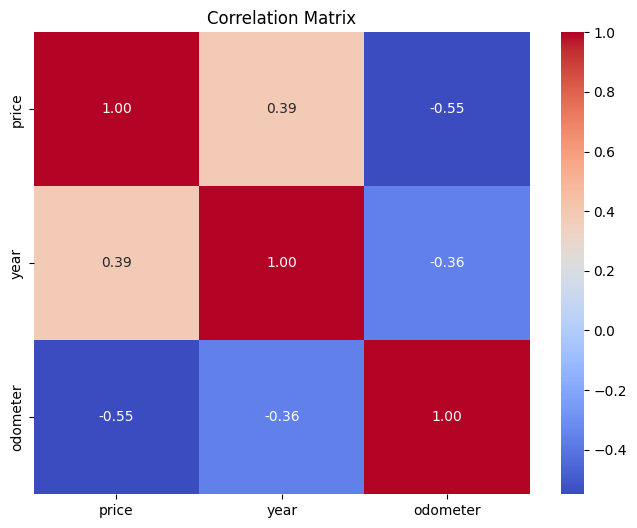

price       1.000000
year        0.387235
odometer   -0.549390
Name: price, dtype: float64


In [22]:
# Identify numeric columns
numeric_columns = df_clean.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns only
correlation_matrix = df_clean[numeric_columns].corr()

# Visualize the correlation matrix with a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Specifically examine at the correlation with the target variable 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

### Preparing Data for Modeling

- Split newly clean dataset into Train and Test datasets
- Impute missing values for Numerical and Categorical features
- Encode Categocical variables

In [23]:
# Separate features and target variable
X = df_clean.drop(['price'], axis=1)
y = df_clean['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (285076, 14)
Test set shape: (71269, 14)


In [24]:
# Impute Missing Values

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Impute missing values for numerical features in the training set
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_features] = num_imputer.fit_transform(X_train[numerical_features])
# Apply the same imputation to the test set
X_test[numerical_features] = num_imputer.transform(X_test[numerical_features])

# Impute missing values for categorical features in the training set
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_features] = cat_imputer.fit_transform(X_train[categorical_features])
# Apply the same imputation to the test set
X_test[categorical_features] = cat_imputer.transform(X_test[categorical_features])

In [25]:
# Encode Categorical Variables

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_train_combined = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

In [26]:
# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Print final shapes
print(f"Final training set shape: {X_train_scaled.shape}")
print(f"Final test set shape: {X_test_scaled.shape}")

Final training set shape: (285076, 163)
Final test set shape: (71269, 163)


In [27]:
# Varify no missing values
missing_values = X_test.isnull().sum()
print(missing_values) 

year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


### Modeling

- Build 3 linear models: Linear Regression, Ridge Regression, Lasso Regression
- Evaluate performance, adjust parameters, search for the best parameters using GridSearchCV, Cross-Validate findings
- Try 3 new non-linear models as a comparison to account for non-linear relationships in the data: Decision Tree, Random Forest, XGBoost
- Evaluate performance, cross-validate, and compare to non-linear models

In [28]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
}

# Evaluate each model using cross-validation and then on the test set
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"{name}: Mean CV RMSE = {np.mean(cv_rmse):.2f}, Std CV RMSE = {np.std(cv_rmse):.2f}")

    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Test RMSE = {np.sqrt(mse):.2f}, R^2 = {r2:.2f}")

Linear Regression: Mean CV RMSE = 8934.51, Std CV RMSE = 108.07
Linear Regression: Test RMSE = 8845.07, R^2 = 0.63
Ridge Regression: Mean CV RMSE = 8934.51, Std CV RMSE = 108.07
Ridge Regression: Test RMSE = 8845.07, R^2 = 0.63
Lasso Regression: Mean CV RMSE = 8934.65, Std CV RMSE = 108.20
Lasso Regression: Test RMSE = 8845.29, R^2 = 0.63


In [29]:
# GridSearchCV was performed in an earlier version of this notebook, which took a very long time to compute. The results provided best alpha for Ridge model = 10. Other linear models did not converge.
# Re-Fit the models and extract coefficients

linear_model = LinearRegression()
ridge_model = Ridge(alpha=10.0)  # Using the best alpha found from attempting GridSearchCV in an earlier version of this workbook, which took a very long time. 
lasso_model = Lasso(alpha=0.1, max_iter=1000)  

# Fit the models
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Extract coefficients
def interpret_coefficients(model, feature_names):
    coeffs = model.coef_
    coeffs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs})
    return coeffs_df.sort_values(by='Coefficient', ascending=False)

linear_coeffs = interpret_coefficients(linear_model, X_train_combined.columns)
ridge_coeffs = interpret_coefficients(ridge_model, X_train_combined.columns)
lasso_coeffs = interpret_coefficients(lasso_model, X_train_combined.columns)

# Adjust pandas display settings to show more rows to see more of the coefficients for better understanding
pd.set_option('display.max_rows', 200)  

# Display coefficients for Linear Regression
print("Linear Regression Coefficients:")
print(linear_coeffs)

# Display coefficients for Ridge Regression
print("\nRidge Regression Coefficients:")
print(ridge_coeffs)

# Display coefficients for Lasso Regression
print("\nLasso Regression Coefficients:")
print(lasso_coeffs)

# Evaluate models on the test set
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"{name}: Mean CV RMSE = {np.mean(cv_rmse):.2f}, Std CV RMSE = {np.std(cv_rmse):.2f}")

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Test RMSE = {np.sqrt(mse):.2f}, R^2 = {r2:.2f}")

Linear Regression Coefficients:
                          Feature  Coefficient
0                            year  3430.592186
12           manufacturer_ferrari  1302.560529
97                    type_pickup   926.570656
99                     type_truck   818.486520
38             manufacturer_tesla   795.579662
33           manufacturer_porsche   726.481498
92                     type_coupe   689.047651
43                    model_Other   649.495360
96                     type_other   562.692093
87                 size_full-size   544.745007
53                    model_f-150   513.703664
63                 condition_good   449.792548
61                 model_wrangler   449.257174
83            transmission_manual   439.892010
34               manufacturer_ram   421.032815
42                     model_2500   387.135622
159                      state_wa   382.633814
91               type_convertible   370.384025
59           model_silverado 1500   366.283287
15               manufacture

In [30]:
# Initialize Decision Tree and Random Forest models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the models
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"{name}: Mean CV RMSE = {np.mean(cv_rmse):.2f}, Std CV RMSE = {np.std(cv_rmse):.2f}")

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Test RMSE = {np.sqrt(mse):.2f}, R^2 = {r2:.2f}")


Decision Tree: Mean CV RMSE = 6422.88, Std CV RMSE = 100.56
Decision Tree: Test RMSE = 6187.57, R^2 = 0.82


In [ ]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_combined.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

In [ ]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"XGBoost: Mean CV RMSE = {np.mean(cv_rmse):.2f}, Std CV RMSE = {np.std(cv_rmse):.2f}")

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost: Test RMSE = {np.sqrt(mse):.2f}, R^2 = {r2:.2f}")


XGBoost: Mean CV RMSE = 6317.70, Std CV RMSE = 113.44
XGBoost: Test RMSE = 6223.63, R^2 = 0.82


### Model Evaluation and Key Findings

#### Key Findings:

1) 3 linear models were created: Linear Regression, Ridge Regression and Lasso Regression.  Two non-linear models were created: Random Forest and XGBoost. 
2) All 3 linear models performed similarly and were only 63% accurate, based on the R² score of 0.63. Test RMSE for all 3 models was just under 8845.
3) GridSearchCV was attempted for the linear models.  This required a very long compute time, and only the Ridge model parameter of Alpha = 10 was obtained. Attempts to get other best parameters did not work as GidSearchCV did not converge with the allotted compute power after several iteration increases.
4) Decision Tree model performed much better than the Linear Models, capturing non-linear relationships in the data, with 82% accuracy based on the R² score of 0.82. Test RMSE was also slightly better = 6188
5) Random Forest model performed the best by reducing overfitting and averaging multiple trees with 89% accuracy.  Test RMSE was also slightly better than Decision Tree, and almost half the value of the RMSE error of the Linear Models. Test RMSE = 4863.
6) XGBoost performed similarly to Decision Tree with R² score of 0.82 and Test RMSE = 6224

#### Notable Findings from Analysis of Linear Models Coefficients:
Based on the coefficients from the Linear Regression model, we can derive insights into how each feature influences the price of a used car. Since the coefficients from the Ridge and Lasso Regression models are similar, we'll focus on the Linear Regression model for this analysis.

1) Year (3431)
- For each additional year (newer model year), the price of a car increases by approximately $3431. This makes sense as newer cars are typically more valuable.

2) Manufacturer
- Ferrari (1303): Being a luxury brand, Ferrari significantly increases the car price by about $1303 compared to other manufacturers.
- Tesla (796): Tesla cars also command a higher price, increasing the value by approximately $796.
- Porsche (726): Similar to Ferrari and Tesla, Porsche increases the car's price by around $726.
- Other Brands: Brands like GMC, Lexus, and others also show positive coefficients, indicating their positive impact on car prices. On the other hand, manufacturers like Nissan (-931), Kia (-806), and Chrysler (-568) decrease the price, indicating lower market valuation.

3) Type of Vehicle
- Pickup (927): Pickup trucks increase the car's price by approximately $926.57, showing their high demand and value.
- Truck (818): Trucks increase the price by $818.49, similar to pickups.
- Coupe (689): Coupes add about $689.05 to the car's price.
- Other Types: Types like sedan (-763) and hatchback (-623) have negative coefficients, indicating they might be valued lower compared to other types.

4) Condition of the Car
- Good Condition (450): Cars in good condition are valued $450 higher than those in other conditions.
- New Condition (340): New cars add $340 to the price, reflecting their higher market value.
- Fair Condition (-281): Cars in fair condition decrease the price by $281.

5) Odometer (-6913)
- For every additional unit on the odometer, the car's price decreases by $6913. This significant decrease highlights the impact of mileage on car depreciation.

6) Size
- Full-Size (545): Full-size cars increase the price by $545, reflecting their higher market value.
- Mid-Size (290): Mid-size cars add $290 to the price.
- Sub-Compact (-31): Sub-compact cars decrease the price by $31.
 

#### Notable Findings from Random Forest Feature Importances

1) Year (0.403395)
- The year of the car is the most important feature in predicting its price, contributing to ~40% of the decision making process in the model. This indicates that newer cars are generally valued higher. The high importance suggests that the age of the car significantly influences its market value, as newer models typically have better features, less wear and tear, and more up-to-date technology.

2) Odometer (0.138815)
- The odometer reading is the 2nd most important feature, contributing to ~14% of the decision making process in the model. Higher mileage usually correlates with more wear and tear, reducing the car's value. The importance of this feature highlights how critical mileage is in determining the price of a used car.

3) Drive Type (drive_fwd - 0.083800)
- The drive type, particularly front-wheel drive (FWD), is an important factor. This might be because FWD vehicles are generally more fuel-efficient and offer better traction in various driving conditions, making them more desirable in certain markets.

4) Cylinders (cylinders_8 cylinders - 0.027287, cylinders_4 cylinders - 0.015718)
- The number of cylinders in the engine also plays a role. Eight-cylinder cars typically have higher power and performance, which can be appealing to certain buyers, while four-cylinder engines are often more fuel-efficient and cost-effective.

5) Vehicle Type (type_truck - 0.012777)
- Trucks have a significant impact on the price, suggesting that they are valued differently compared to other types of vehicles, likely due to their utility, durability, and market demand.

6) Manufacturer (ferrari - 0.011035)
- The manufacturer, specifically Ferrari in this case, is an important determinant of car price. Luxury brands like Ferrari generally command higher prices due to their brand value, performance, and exclusivity.

#### Summary Of Model Performances

##### Linear Regression:
- Mean CV RMSE: 8934.51
- Test RMSE: 8845.07
- R²: 0.63

##### Ridge Regression:
- Mean CV RMSE: 8934.51
- Test RMSE: 8845.07
- R²: 0.63

##### Lasso Regression:
- Mean CV RMSE: 8934.65
- Test RMSE: 8845.29
- R²: 0.63

##### Decision Tree:
- Mean CV RMSE: 6432.42
- Test RMSE: 6154.53
- R²: 0.82

##### Random Forest:
- Mean CV RMSE: 4976.42
- Test RMSE: 4859.50
- R²: 0.89

##### XGBoost:
- Mean CV RMSE: 6317.70
- Test RMSE: 6223.63
- R²: 0.82


### Actionable Insights & Recommendations:

#### Modeling Recommendations
- Non-Linear Models: Given the superior performance of non-linear models like Random Forest and XGBoost, prioritize these models for future analysis. They capture complex relationships in the data more effectively than linear models. Keep in mind that Random Forest requires a much longer compute time compared to XGBoost. 
- Hyperparameter Tuning: Continuously refine hyperparameters for non-linear models to further enhance performance. Utilize techniques like GridSearchCV or RandomizedSearchCV but with optimized parameters to balance accuracy and computational efficiency.
- Additional Features: Explore creating new features or interactions between existing ones. For instance, combining year and odometer to form an age feature might provide additional insights.
- Handling Missing Values: Experiment with different imputation methods for missing values to ensure the model utilizes the complete dataset effectively.

#### Business Recommendations
- Pricing Strategy: Focus on the year and odometer readings of cars. Newer cars with lower mileage should be priced higher due to their higher market value. Pay attention to high-demand manufacturers like Ferrari, Tesla, and Porsche, as well as vehicle types like pickups and trucks. These tend to sell for higher prices and should be prioritized in inventory.
- Inventory Management: Consider the importance of drive type and fuel efficiency in your inventory decisions. Vehicles with FWD and fuel-efficient options like 4-cylinder engines are more desirable and should be prioritized. Ensure cars in good or new condition are well-represented in your inventory. These cars tend to have higher market values and can contribute to increased profitability.
- Consumer Preferences: Align your inventory with consumer preferences highlighted by the model. For example, if the model indicates a higher preference for certain manufacturers or types, adjust your acquisition strategy accordingly.
- Marketing and Sales: Highlight Key Features in marketing materials and sales pitches that add value, such as low mileage, recent model years, and popular manufacturers. Use the insights to create targeted promotions for high-value cars, leveraging the model's findings to attract more customers and close more sales.